In [2]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def get_error(sorted_data, x, p, is_int=False):
    if is_int:
        x = np.round(x)
    n = len(sorted_data)
    li = np.searchsorted(sorted_data, x, side="left")
    ri = np.searchsorted(sorted_data, x, side="right")
    qi = int(p * n)
    if ri < qi:
        return (qi-ri)*1.0/n
    elif li > qi:
        return (li-qi)*1.0/n
    else:
        return 0.0

In [4]:
colormap = {
    "cmoments_l": "C0",
    "cmoments_nl": "C1",
}
markers = {
    "cmoments_l": "x",
    "cmoments_nl": "o",
}
alg_display_name = {
    "cmoments_l": "With Log",
    "cmoments_nl": "No Log",
}

In [5]:
datasets = ["milan", "exponential", "occupancy", "retail"]
dataset_paths = {
    "milan": ("../../datasets/internet-mi-2013-11.csv","internet"),
    "exponential": ("../../datasets/exponential_10M.csv","x"),
    "occupancy": ("../../datasets/occupancy_2.csv", "CO2"),
    "retail": ("../../datasets/retail_quantity_pos.csv", "Quantity")
}
sorted_vals = {}
for d in datasets:
    print(d)
    dpath, dcol = dataset_paths[d]
    df = pd.read_csv(dpath)
    sorted_vals[d] = np.sort(df[dcol])

milan
exponential
occupancy
retail


In [7]:
dataset_int = {
    "milan": False,
    "exponential": False,
    "occupancy": False,
    "retail": True
}

In [8]:
def process(df, sorted_data, is_int=False):
    df["error"] = df.apply(
        lambda r: get_error(
            sorted_data[r["dataset"]], r["quantile_estimate"], r["q"],
            is_int=dataset_int[r["dataset"]]
        ),
        axis=1
    )
    return df

In [13]:
df = pd.read_csv("../javamsketch/results/log_lesion.csv")
dft = process(df, sorted_vals)

In [14]:
dfg = dft.groupby(["dataset","sketch","size_param"]).mean()

In [15]:
m_datasets = ["milan", "retail", "occupancy"]
sketches = ["cmoments_l", "cmoments_nl"]

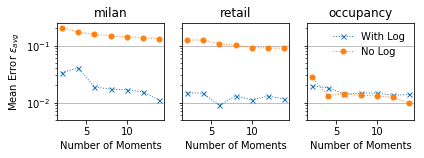

In [16]:
f, axs = plt.subplots(1,len(m_datasets), figsize=(6,2.3), sharey=True)
for di in range(len(m_datasets)):
    dname = m_datasets[di]
    if len(m_datasets) > 1:
        ax = axs[di]
    else:
        ax = axs
    lines = []
    labels = []
    for alg in sketches:
        vals = dfg.loc[dname, alg]
        errors = vals["error"]
        l, = ax.semilogy(
            vals.index-1,
            errors, 
            label=alg_display_name[alg],
            marker=markers[alg],
            color=colormap[alg],
            markersize=5,
            ls="dotted",
            lw=1
        )
        lines.append(l)
        labels.append(alg_display_name[alg])

    ax.set_title(dname)
    ax.set_ylim(0.005, .25)
    if di == 0:
        ax.set_ylabel("Mean Error $\epsilon_{avg}$")
    ax.set_xlabel("Number of Moments")
    ax.yaxis.grid(True)

ax.legend(frameon=False)
# lgd = f.legend(
#     lines, labels,
#     bbox_to_anchor=(0.05, 1.00, 1., .102), ncol=2, loc=2
# )
f.tight_layout()
f.savefig("log_lesion.pdf", bbox_inches='tight')